In [1]:
import pandas as pd

# Load cleaned data
data = pd.read_csv(r'E:\latik\Documents\GitHub\Stock-Movement-Analysis-Based-on-Social-Media-Sentiment\Datasets\cleaned_telegram_data.csv')

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Ensure the VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

# Handle missing or non-string entries and apply sentiment analysis
data['Sentiment'] = data['Cleaned_Text'].fillna('').apply(lambda x: sia.polarity_scores(str(x))['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\latik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date']).dt.date


In [4]:
data.head()

,Message_ID,Sender_ID,Date,Message_Text,Cleaned_Text,Sentiment
0,28800,6.652140e+09,2024-11-28,Be careful of how you speak. Things have a way...,be careful of how you speak things have a way ...,0.1531
1,28799,6.566124e+09,2024-11-27,Hope everyone’s been doing well,hope everyones been doing well,0.6124
2,28798,6.566124e+09,2024-11-27,Hello everyone! I’m so sorry I suddenly disapp...,hello everyone im so sorry i suddenly disappea...,-0.4414
3,28797,6.404398e+09,2024-11-27,That whole family is filled with fakes,that whole family is filled with fakes,-0.4215
4,28796,6.404398e+09,2024-11-27,I call bs on Matthew’s self defense thing,i call bs on matthews self defense thing,0.1280


In [5]:
# Save cleaned data to a new file
data.to_csv(r'sentiment_data.csv', index=False)
print("Data cleaned and saved as 'sentiment_data.csv'")

Data cleaned and saved as 'sentiment_data.csv'


In [6]:
sentiment_df = pd.read_csv(r'Datasets/sentiment_data.csv')

In [7]:
# Save cleaned data to a new file
data.to_csv(r'sentiment_data.csv', index=False)
print("Data cleaned and saved as 'sentiment_data.csv'")

Data cleaned and saved as 'sentiment_data.csv'


In [8]:
# Finding the earliest and latest dates in the sentiment data
min_date = sentiment_df['Date'].min()
max_date = sentiment_df['Date'].max()

print("Date Range: ", min_date, " to ", max_date)


Date Range:  2021-09-06  to  2024-12-05


In [9]:
import yfinance as yf

In [10]:
# Define the stock symbol and period
symbol = "AAPL"  # Example: Apple stock
stock_data = yf.download(symbol, start="2021-09-06", end="2024-12-05", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [11]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2021-09-07,153.940018,156.690002,157.259995,154.389999,154.970001,82278300
2021-09-08,152.387741,155.110001,157.039993,153.979996,156.979996,74420200
2021-09-09,151.365982,154.070007,156.110001,153.949997,155.490005,57305700
2021-09-10,146.355499,148.970001,155.479996,148.699997,155.000000,140893200
2021-09-13,146.925323,149.550003,151.419998,148.750000,150.630005,102404300


In [12]:
# Assuming stock_data is your dataframe
stock_data.to_csv('stock_data.csv', index=True) 

In [13]:
stock_data = pd.read_csv(r'E:\latik\Documents\GitHub\Stock-Movement-Analysis-Based-on-Social-Media-Sentiment\Datasets\stock_data.csv')

In [14]:
stock_data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2021-09-07,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
1,2021-09-08,152.387726,155.110001,157.039993,153.979996,156.979996,74420200
2,2021-09-09,151.365997,154.070007,156.110001,153.949997,155.490005,57305700
3,2021-09-10,146.355499,148.970001,155.479996,148.699997,155.000000,140893200
4,2021-09-13,146.925323,149.550003,151.419998,148.750000,150.630005,102404300
...,...,...,...,...,...,...,...
812,2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400
813,2024-11-29,237.330002,237.330002,237.809998,233.970001,234.809998,28481400
814,2024-12-02,239.589996,239.589996,240.789993,237.160004,237.270004,48137100
815,2024-12-03,242.649994,242.649994,242.759995,238.899994,239.809998,38861000


In [15]:
# Step: Convert the Date column to datetime if not already done
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Step: Sort the DataFrame by the Date column in ascending order
sentiment_df_sorted = sentiment_df.sort_values(by='Date', ascending=True)

# Check the sorted data
print(sentiment_df_sorted.head())


       Message_ID     Sender_ID       Date  \
45396           4 -1.001373e+12 2021-09-06   
45395           5 -1.001373e+12 2021-09-06   
45372          42 -1.001373e+12 2021-09-07   
45371          43 -1.001373e+12 2021-09-07   
45370          45 -1.001373e+12 2021-09-07   

                                            Message_Text  \
45396  RIL prepares a $5.7 billion bid for a telco in...   
45395      Fitch says BPCL privatisation may get delayed   
45372  MULTIPLEX ASSOCIATION OF INDIA (MAI), ALONG WI...   
45371  MOREPEN LAB: CO HAS INCORPORATED A WHOLLY OWNE...   
45370  INDIA GOVT OFFICIAL: BPCL FINANCIAL BIDS LIKEL...   

                                            Cleaned_Text  Sentiment  
45396  ril prepares a  billion bid for a telco in the...     0.0000  
45395      fitch says bpcl privatisation may get delayed    -0.2263  
45372  multiplex association of india mai along with ...    -0.6249  
45371  morepen lab co has incorporated a wholly owned...    -0.2263  
45370  india

In [16]:
import pandas as pd
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date

In [17]:
sentiment_df

,Message_ID,Sender_ID,Date,Message_Text,Cleaned_Text,Sentiment
0,28800,6.652140e+09,2024-11-28,Be careful of how you speak. Things have a way...,be careful of how you speak things have a way ...,0.1531
1,28799,6.566124e+09,2024-11-27,Hope everyone’s been doing well,hope everyones been doing well,0.6124
2,28798,6.566124e+09,2024-11-27,Hello everyone! I’m so sorry I suddenly disapp...,hello everyone im so sorry i suddenly disappea...,-0.4414
3,28797,6.404398e+09,2024-11-27,That whole family is filled with fakes,that whole family is filled with fakes,-0.4215
4,28796,6.404398e+09,2024-11-27,I call bs on Matthew’s self defense thing,i call bs on matthews self defense thing,0.1280
...,...,...,...,...,...,...
45392,9,-1.001373e+12,2021-09-07,**Lincon Pharma ** : Promoter bought 60 k Shar...,lincon pharma promoter bought k shares on s...,0.2960
45393,8,-1.001373e+12,2021-09-07,** JSPL ** : promoters bought 27 k shares on 3...,jspl promoters bought k shares on aug sept,0.2960
45394,6,-1.001373e+12,2021-09-07,Adani Green : Promoter buys 5.2 lkh shares on...,adani green promoter buys lkh shares on sept,0.2960
45395,5,-1.001373e+12,2021-09-06,Fitch says BPCL privatisation may get delayed,fitch says bpcl privatisation may get delayed,-0.2263


In [18]:
sentiment_df.to_csv('Sentiment_data.csv' , index=False)

In [19]:
# Step: Convert the Date column to datetime if not already done
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Step: Sort the DataFrame by the Date column in ascending order
sentiment_df_sorted = sentiment_df.sort_values(by='Date', ascending=True)

# Check the sorted data
print(sentiment_df_sorted.head())


       Message_ID     Sender_ID       Date  \
45396           4 -1.001373e+12 2021-09-06   
45395           5 -1.001373e+12 2021-09-06   
45372          42 -1.001373e+12 2021-09-07   
45371          43 -1.001373e+12 2021-09-07   
45370          45 -1.001373e+12 2021-09-07   

                                            Message_Text  \
45396  RIL prepares a $5.7 billion bid for a telco in...   
45395      Fitch says BPCL privatisation may get delayed   
45372  MULTIPLEX ASSOCIATION OF INDIA (MAI), ALONG WI...   
45371  MOREPEN LAB: CO HAS INCORPORATED A WHOLLY OWNE...   
45370  INDIA GOVT OFFICIAL: BPCL FINANCIAL BIDS LIKEL...   

                                            Cleaned_Text  Sentiment  
45396  ril prepares a  billion bid for a telco in the...     0.0000  
45395      fitch says bpcl privatisation may get delayed    -0.2263  
45372  multiplex association of india mai along with ...    -0.6249  
45371  morepen lab co has incorporated a wholly owned...    -0.2263  
45370  india

In [20]:
# Assuming sentiment_df is sorted by date as previously shown
sentiment_df_sorted['Date'] = pd.to_datetime(sentiment_df_sorted['Date'])

# Ensure that stock_data also has the Date column in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Merge both datasets on the 'Date' column
merged_data = pd.merge(sentiment_df_sorted, stock_data, on='Date', how='inner')

# Check the first few rows of the merged data
print(merged_data.head())


   Message_ID     Sender_ID       Date  \
0          42 -1.001373e+12 2021-09-07   
1          43 -1.001373e+12 2021-09-07   
2          45 -1.001373e+12 2021-09-07   
3          46 -1.001373e+12 2021-09-07   
4          47 -1.001373e+12 2021-09-07   

                                        Message_Text  \
0  MULTIPLEX ASSOCIATION OF INDIA (MAI), ALONG WI...   
1  MOREPEN LAB: CO HAS INCORPORATED A WHOLLY OWNE...   
2  INDIA GOVT OFFICIAL: BPCL FINANCIAL BIDS LIKEL...   
3  Telecom stocks: Sources says govt likely to gi...   
4  TVS MOTERS  : #TVSMotor expands in #SouthAfric...   

                                        Cleaned_Text  Sentiment   Adj Close  \
0  multiplex association of india mai along with ...    -0.6249  153.940002   
1  morepen lab co has incorporated a wholly owned...    -0.2263  153.940002   
2  india govt official bpcl financial bids likely...     0.0000  153.940002   
3  telecom stocks sources says govt likely to giv...     0.4767  153.940002   
4  tvs moters  

In [21]:
merged_data.to_csv('Final_Data.csv', index = False)

In [22]:
final_df = pd.read_csv('Datasets/Final_Data.csv')

In [23]:
final_df

,Message_ID,Sender_ID,Date,Message_Text,Cleaned_Text,Sentiment,Adj Close,Close,High,Low,Open,Volume
0,42,-1.001373e+12,2021-09-07,"MULTIPLEX ASSOCIATION OF INDIA (MAI), ALONG WI...",multiplex association of india mai along with ...,-0.6249,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
1,43,-1.001373e+12,2021-09-07,MOREPEN LAB: CO HAS INCORPORATED A WHOLLY OWNE...,morepen lab co has incorporated a wholly owned...,-0.2263,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
2,45,-1.001373e+12,2021-09-07,INDIA GOVT OFFICIAL: BPCL FINANCIAL BIDS LIKEL...,india govt official bpcl financial bids likely...,0.0000,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
3,46,-1.001373e+12,2021-09-07,Telecom stocks: Sources says govt likely to gi...,telecom stocks sources says govt likely to giv...,0.4767,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
4,47,-1.001373e+12,2021-09-07,TVS MOTERS : #TVSMotor expands in #SouthAfric...,tvs moters tvsmotor expands in southafrica n...,0.1027,153.940002,156.690002,157.259995,154.389999,154.970001,82278300
...,...,...,...,...,...,...,...,...,...,...,...,...
38498,24157,-1.001373e+12,2024-12-04,#BrokerageRadar | UBS on Bajaj Auto: Maintains...,brokerageradar ubs on bajaj auto maintains se...,0.6705,243.009995,243.009995,244.110001,241.250000,242.869995,44353000
38499,24156,-1.001373e+12,2024-12-04,STAR CEMENT\r\n\r\nADANI SAID TO ACQUIRE STAR ...,star cement\r\n\r\nadani said to acquire star ...,0.3182,243.009995,243.009995,244.110001,241.250000,242.869995,44353000
38500,24154,-1.001373e+12,2024-12-04,. Core Committee approves the name of for th...,core committee approves the name of for the...,0.4019,243.009995,243.009995,244.110001,241.250000,242.869995,44353000
38501,24155,-1.001373e+12,2024-12-04,STAR CEMENT IN FOCUS \r\n\r\nADANI GROUP EVAL...,star cement in focus \r\n\r\nadani group eval...,0.0000,243.009995,243.009995,244.110001,241.250000,242.869995,44353000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target variable
features = final_df[['Sentiment', 'Volume', 'Open', 'High', 'Low']]
target = final_df['Adj Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
print(predictions)


[145.01704598 190.44553979 220.42153809 ... 213.35372988 221.53344871
 190.52415971]


In [45]:
# Defining sentiment categories (example: threshold = 0.1)
final_df['Sentiment_Category'] = final_df['Sentiment'].apply(lambda x: 'Buy' if x > 0.1 else ('Sell' if x < -0.1 else 'Hold'))

# Check the first few rows of the dataset with buy/sell signals
print(final_df[['Date', 'Sentiment', 'Sentiment_Category', 'Adj Close']].head())


         Date  Sentiment Sentiment_Category   Adj Close
0  2021-09-07    -0.6249               Sell  153.940002
1  2021-09-07    -0.2263               Sell  153.940002
2  2021-09-07     0.0000               Hold  153.940002
3  2021-09-07     0.4767                Buy  153.940002
4  2021-09-07     0.1027                Buy  153.940002


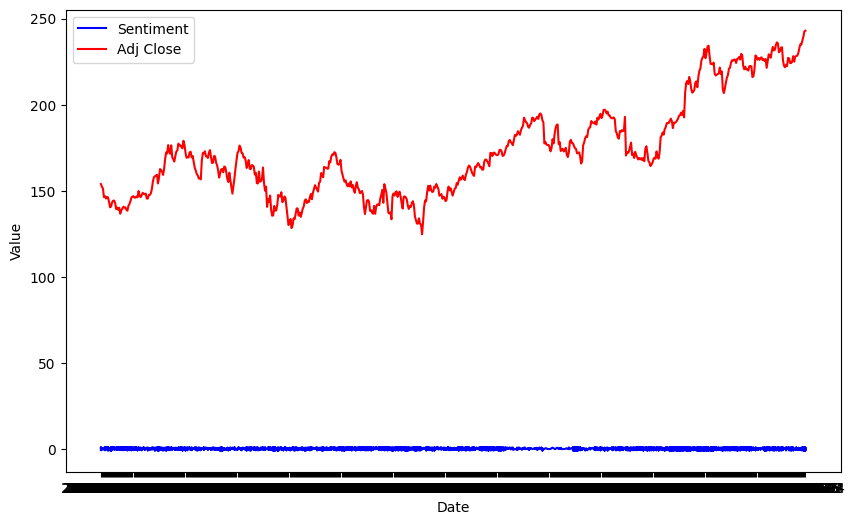

In [46]:
import matplotlib.pyplot as plt

# Plot sentiment and stock price
plt.figure(figsize=(10,6))
plt.plot(final_df['Date'], final_df['Sentiment'], label='Sentiment', color='blue')
plt.plot(final_df['Date'], final_df['Adj Close'], label='Adj Close', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 1.0513521467844091
Mean Absolute Error (MAE): 0.7137861364637559
R² Score: 0.9984531144920693


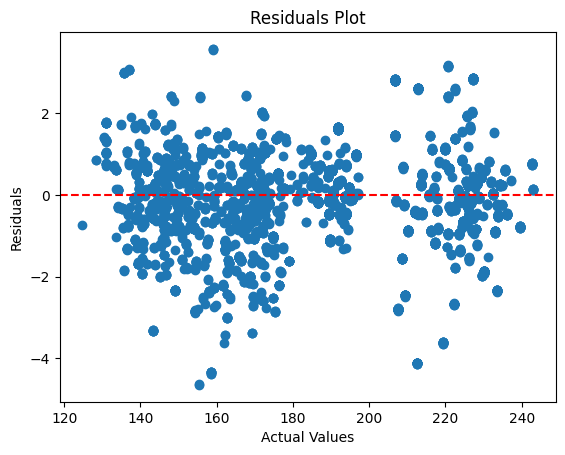

In [48]:
import matplotlib.pyplot as plt

residuals = y_test - predictions
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


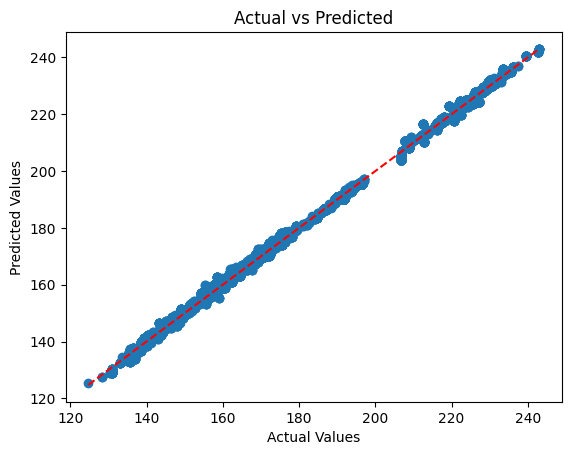

In [49]:
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [50]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Define the acceptable error threshold (e.g., 0.1% error margin)
threshold = 0.001

# Function to classify predictions as correct (True) or incorrect (False)
def classify_predictions(y_true, predictions, threshold):
    # Calculate absolute percentage error
    error_percentage = np.abs((y_true - predictions) / y_true)
    return error_percentage <= threshold

# Assuming y_test and predictions are your actual and predicted values
correct_predictions = classify_predictions(y_test, predictions, threshold)

# Convert boolean values to 1 (True) and 0 (False) for calculation
y_true_classified = correct_predictions.astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_true_classified, correct_predictions)
precision = precision_score(y_true_classified, correct_predictions)
f1 = f1_score(y_true_classified, correct_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
